# Create Features

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

In [4]:
def create_feature_matrix(sample_size, n_features, x_min, x_max):
    #create sample_size*n_features with x_min and x_max
    #put this features in a 1x2 vector 
    finalNpArray = []
    
    #ihc kann eine range schleife eerstellen die in jedem durchgang ein np array mit n feature vectros erstellt
    for i in range(sample_size):
        x = 0
        x = np.random.uniform(x_min, x_max, n_features)
        x = x.tolist()
        finalNpArray.append(x)
    arr = np.array(finalNpArray)
        
    return arr
    
    raise NotImplementedError("You should implement this!")

In [5]:
sample_size = 100
n_features = 2
x_min = [1.5, -0.5]
x_max = [11., 5.0]

X = create_feature_matrix(sample_size, n_features, x_min, x_max)
X

array([[10.37485221,  2.96016254],
       [ 2.94927188,  2.07446104],
       [ 8.77625064,  3.34773574],
       [ 8.75284767,  4.35223417],
       [ 7.87113433,  0.56191277],
       [ 9.85717455,  0.47273283],
       [ 9.32784327,  3.53819093],
       [ 2.94132351,  0.58723163],
       [ 3.40144351,  1.37876877],
       [ 8.45601529,  3.11752944],
       [ 4.40826902,  0.71175642],
       [ 5.10385384,  4.50167033],
       [ 7.06329274,  3.14975345],
       [ 8.07547883,  0.45966783],
       [ 2.75016303,  3.14672377],
       [10.47403507,  0.85081984],
       [ 1.97658781,  1.43818622],
       [ 2.11529618,  2.58801382],
       [ 1.66873836,  3.87775107],
       [ 2.51976237,  0.53470482],
       [ 9.21852088,  2.29349742],
       [ 7.14210963,  0.8818582 ],
       [ 2.17151085,  2.64231053],
       [ 7.83111974,  3.34969546],
       [ 3.62615836, -0.16952994],
       [ 6.99587441,  1.35587372],
       [ 4.33042898,  0.68161627],
       [10.74631963,  0.95236651],
       [ 4.61931802,

In [6]:
assert len(X[:,0]) == sample_size
assert len(X[0,:]) == n_features
for i in range(n_features):
    assert np.max(X[:,i]) <= x_max[i]
    assert np.min(X[:,i]) >= x_min[i]

# Linear Hypothesis

In [7]:
def linear_hypothesis(thetas):
    return lambda x: np.sum(thetas*np.insert(x, 0, 1, axis=1), axis=1)
    ''' Combines given list argument in a linear equation and returns it as a function
    
    Args:
        thetas: list of coefficients
        
    Returns:
        lambda that models a linear function based on thetas and x
    '''
    raise NotImplementedError("You should implement this!")

In [8]:
linearHypothesisLambda = linear_hypothesis([.1,.2,.3])

linearHypothesisLambda(X)

array([3.0630192 , 1.31219269, 2.85957085, 3.15623979, 1.8428007 ,
       2.21325476, 3.02702593, 0.86443419, 1.19391933, 2.72646189,
       1.19518073, 2.47127187, 2.45758458, 1.85299612, 1.59404974,
       2.45005297, 0.92677343, 1.29946338, 1.59707299, 0.76436392,
       2.6317534 , 1.79297939, 1.32699533, 2.67113259, 0.77437269,
       1.905937  , 1.17057068, 2.53497388, 1.60901186, 1.84600939,
       2.08149269, 1.90970389, 2.09254758, 0.84067043, 2.17182294,
       1.89916646, 2.18710971, 1.7465462 , 2.08042695, 1.35606185,
       2.1515993 , 1.53137333, 2.0048177 , 1.3690142 , 1.07409138,
       2.4077826 , 1.40902616, 1.88780789, 2.03066991, 2.01408886,
       2.10699307, 1.52428037, 2.36489317, 1.45973109, 2.48395069,
       1.20551868, 2.20992364, 1.28403152, 1.67426149, 3.3090872 ,
       0.98844922, 1.77038759, 0.96613166, 1.80218358, 1.89401434,
       2.94606466, 2.83624813, 1.3113076 , 3.11933435, 2.15985973,
       1.56549178, 1.03321714, 2.14132005, 2.35450543, 2.29065

In [9]:
assert (len(linear_hypothesis([.1,.2,.3])(X))) == sample_size

# Generate Target Values

In [10]:
def generate_targets(X, theta, sigma):
    #y = das ergebnis meiner linear hypothesis
    #was ist gaussian noise?
    lH = linear_hypothesis(theta)(X)
    noise = np.random.normal(0, sigma, lH.shape)
    y = lH+noise
    return y
    ''' Combines given arguments in a linear equation with X, 
    adds some Gaussian noise and returns the result
    
    Args:
        X: 2D numpy feature matrix
        theta: list of coefficients
        sigma: standard deviation of the gaussian noise
        
    Returns:
        target values for X
    '''
    raise NotImplementedError("You should implement this!")

In [11]:
theta = (2., 3., -4.)
#why do we use here so much noise?
sigma = 3.
y = generate_targets(X, theta, sigma)
print(y)

[25.4456208   3.4730837  17.27113876 10.78521235 23.60448463 35.1491693
 16.40463674  6.98089925  7.04706587 14.39831814  9.34502983 -4.39266974
  6.68288302 25.02248317 -4.61865253 33.3490331   3.53929679 -1.08483071
 -9.10213417  3.92498932 20.44557685 21.09114872  0.59838783 14.42731288
 14.80106149 13.21987402 15.64417    33.15629799  5.56542403 -0.81490132
 -3.9231911  15.05266258  4.63710692  8.38255597 32.56664347  8.26369586
 12.35882651  2.63311034  0.09995787 27.5450354   2.51467258 11.22338388
  9.86174326 -0.6643858  21.58686829  9.7001167  -3.70226203  1.26311118
 30.69140748  6.42793812 10.85297916 13.20753536 13.23246124  0.24379616
 28.35286736 17.28106382 26.12630034 17.86946034  8.55637405 21.46372547
 14.67942083 27.43954981  9.52062275 23.47075826  2.05277113  4.40839432
 10.39460433  4.79438742 22.15613557  0.40227255 17.0032842  21.34875006
  2.59711678 -3.08853108 10.88243182 -2.68318715 32.10574914 10.14698476
 -3.51696003  3.05237096  9.24144054 32.64321249 10.

In [12]:
assert len(y) == sample_size

# Plot the data

In [13]:
%matplotlib notebook
import random

def plot_data_scatter(features, targets):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(features[:,0], features[:,0], targets)
    return plt.show()
    """ Plots the features and the targets in a 3D scatter plot
    
    Args:
        features: 2D numpy-array features
        targets: ltargets
    """
    raise NotImplementedError("You should implement this!")

<IPython.core.display.Javascript object>


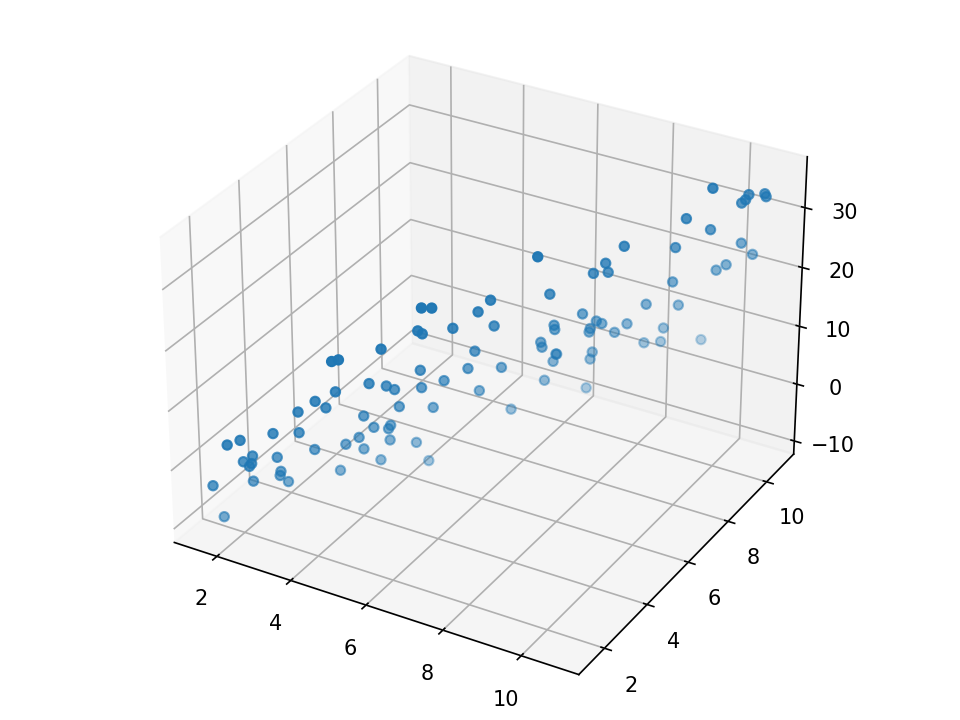

In [14]:
plot_data_scatter(X, y) 

# Cost Function

In [15]:
def mse_cost_function(x, y):   
    return lambda theta: 1/(2*(len(x)))*(sum((linear_hypothesis(theta)(x)-y)**2))
    ''' Implements MSE cost function as a function J(theta) on given traning data 
    
    Args:
        x: vector of x values 
        y: vector of ground truth values y 
        
    Returns:
        lambda J(theta) that models the cost function
    '''
    raise NotImplementedError("You should implement this!")

In [16]:
J = mse_cost_function(X, y)
print(J(theta))

3.5528611441477707


# Gradient Descent

In [67]:
def update_theta(x, y, theta, learning_rate):
    x2 = x
    numbers = []
    for i in theta:
        numbers.append(i)

    theta0 = (1 / 1*(len(x))*(sum((linear_hypothesis(theta)(x))-y)))
    x2 = np.insert(x2, 0, 1, axis=1)
    print(range(len(x)))
    print(range(len(theta)))
    for i in range(len(x)):
        for j in range(len(numbers)):
            #print(x[i][j])
            numbers[j] = numbers[j] - ((1 / 1*(len(x)))*(sum((linear_hypothesis(theta)(x)-y)*x2[i][j]))*learning_rate)
    #ich muss eine formel aufstellen die aus den gegebenen argumenten das ergebnis der kettenregel berechnet
    #das ergebnis welches ich für jedes theta erhalte muss ich von dem alten theta abziehen
    #es geht darum für jedes alte theta ein neues theta zu brerechnen 
   
        
    return numbers
    
    ''' Updates learnable parameters theta 
    
    The update is done by calculating the partial derivities of 
    the cost function including the linear hypothesis. The 
    gradients scaled by a scalar are subtracted from the given 
    theta values.
    
    Args:
        x: 2D numpy array of x values
        y: array of y values corresponding to x
        theta: current theta values
        learning_rate: value to scale the negative gradient 
        
    Returns:
        theta: Updated theta vector
    '''
    raise NotImplementedError("You should implement this!")

In [68]:
print(update_theta(X, y, theta, 0.0003))

range(0, 100)
range(0, 3)
[-6.910458235939255, -50.87094195869526, -22.69620478590886]


In [47]:
def gradient_descent(learning_rate, theta, iterations, x, y, cost_function):
    
    cost_hist = np.zeros(iterations)
    theta_hist = np.zeros(iterations)
    
    for i in range(iterations):
        theta = update_theta(x, y, theta, learning_rate)
        theta_hist[i] = theta
        cost_hist[i] = mse_cost_function(x, y)(theta)
    return cost_hist, theta_hist
    ''' Minimize theta values of a linear model based on MSE cost function
    Args:
        learning_rate: scalar, scales the negative gradient 
        theta: initial theta values
        x: vector, x values from the data set
        y: vector, y values from the data set
        iterations: scalar, number of theta updates
        cost_function: python function for computing the cost
        
    Returns:
        history_cost: cost after each iteration
        history_theta: Updated theta values after each iteration
    '''
    raise NotImplementedError("You should implement this!")

In [20]:
# Your implementation:

alpha = 42.42 # assign an appropriate value
nb_iterations = 1337 # assign an appropriate value
start_values_theta = [42., 42., 42.] # assign appropriate values
history_cost, history_theta = gradient_descent(alpha, start_values_theta, nb_iterations, X, y,  mse_cost_function)

[268.49812823 209.3584964  467.11677306 398.90629053 194.87161139
 180.3688536  589.32186804 566.43904594 316.04796674 657.65355694
 324.08655218 488.9656281  656.96425022 228.88373667 510.40825218
 527.45182806 472.78051428 401.86498827 334.80363164 469.50062396
 601.180631   294.12673691 333.79003879 185.87122014 606.93886584
 550.42623299 371.72226714 143.20749041 426.63384171 485.5678034
 416.26203534 460.86757737 394.24176923 542.67069847 472.77068951
 373.07035892 150.98865305 191.07842278 423.7416565  515.21932966
 454.48281941 704.02547007 624.45592075 323.30851822 390.87271492
 428.43011482 586.86875764 249.65538863 561.70378758 392.5729726
 412.40173344 628.57549618 185.72316929 242.10716275 333.02480081
 577.59792778 231.23586649 582.14819846 362.17917506 513.6496773
 452.85899908 355.52355446 562.55535549 321.21878336 512.03673709
 165.699837   229.65904413 312.14468998 315.73393098 411.48780242
 465.32927733 432.20822709 486.25402003 553.46717841 170.56663161
 520.39001993

ValueError: setting an array element with a sequence.

In [21]:
print(np.zeros(1000))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [22]:
print(np.random.random())

0.8505242815671736


In [31]:
J = mse_cost_function(X, y)
print(J(theta))

5.724294569843657


In [ ]:
#zuerst wird start thetas und cost init